# **Machine Learning Techniques Project**


*   Nicolas Bedoya Figueroa
*   Daniel Escalante Perez
*   Marilyn Stephany Joven Fonseca
*   Eder Leandro Carbonero Baquero

### **Utils**

In [1]:
!pip install nltk pyspellchecker tqdm emoji nlpaug transformers tensorflow xgboost[gpu] accelerate

zsh:1: no matches found: xgboost[gpu]


In [2]:
!pip install seaborn transformers torch tqdm

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install umap-learn plotly

Defaulting to user installation because normal site-packages is not writeable


## Logistic regression
**Machine Learning Models**
**Eder Leandro Carbonero Baquero**

### Carga de datos

In [4]:
import pandas as pd
import numpy as np
import ast
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# === 1. CARGAR DATOS ===
df_rg = pd.read_csv('data/embeddings_data.csv')  # ← Archivo fuente

# Convertir la columna embedding_mean de string a lista de floats
df_rg['embedding_mean'] = df_rg['embedding_mean'].apply(ast.literal_eval)

# === 2. PREPARAR FEATURES Y LABELS ===
X = np.vstack(df_rg['embedding_mean'].values)  # (n_samples, 768)
y = df_rg['class'].values       

In [5]:
# === 3. DIVIDIR EN TRAIN Y TEST ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. ENTRENAR MODELO DE REGRESIÓN LOGÍSTICA ===
log_reg_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)
log_reg_model.fit(X_train, y_train)

# === 5. PREDICCIONES Y MÉTRICAS ===
y_pred = log_reg_model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

### Métricas

In [6]:
# Imprimir métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8627
Precisión: 0.8980
Recall: 0.8246
F1-score: 0.8597


#### Curva ROC

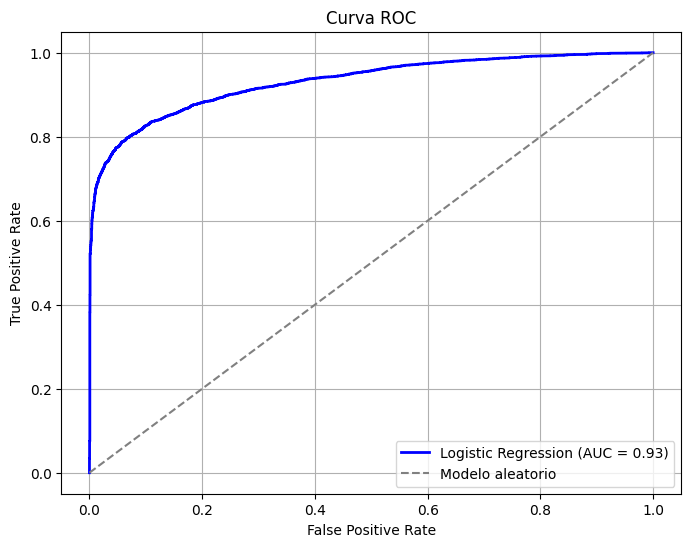

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Graficar curva ROC comparada contra aleatorio
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Modelo aleatorio')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### Curva de Precisión-Recall

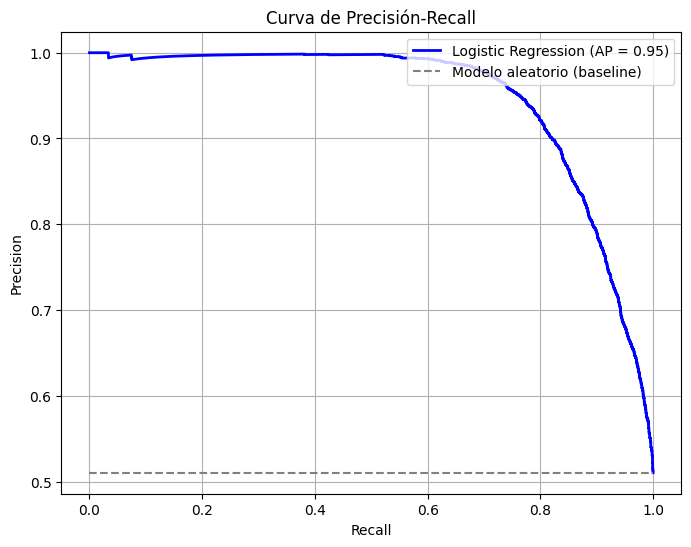

In [8]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calcular curva Precision-Recall
probs = log_reg_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, probs)
avg_precision = average_precision_score(y_test, probs)

# Línea base (proporción de positivos en los datos de prueba)
baseline = sum(y_test) / len(y_test)

# Graficar curva Precision-Recall comparada contra baseline
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Logistic Regression (AP = {avg_precision:.2f})')
plt.hlines(y=baseline, xmin=0, xmax=1, color='gray', linestyle='--', label='Modelo aleatorio (baseline)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


#### Matriz de Confusión

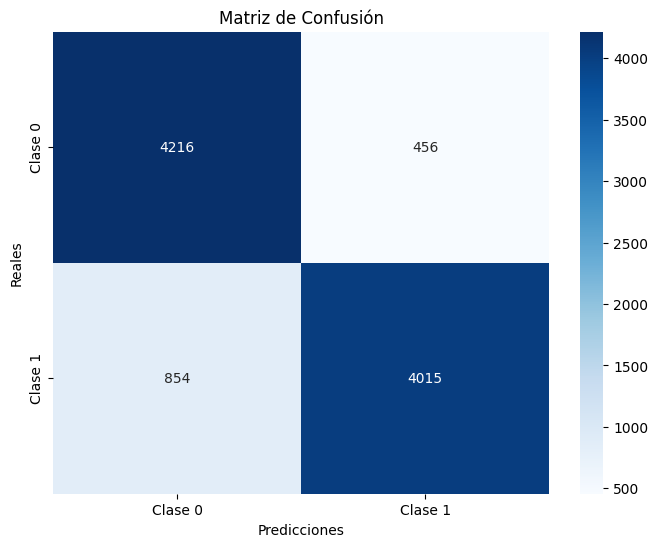

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión')
plt.show()


#### Distribución de las Probabilidades Predichas

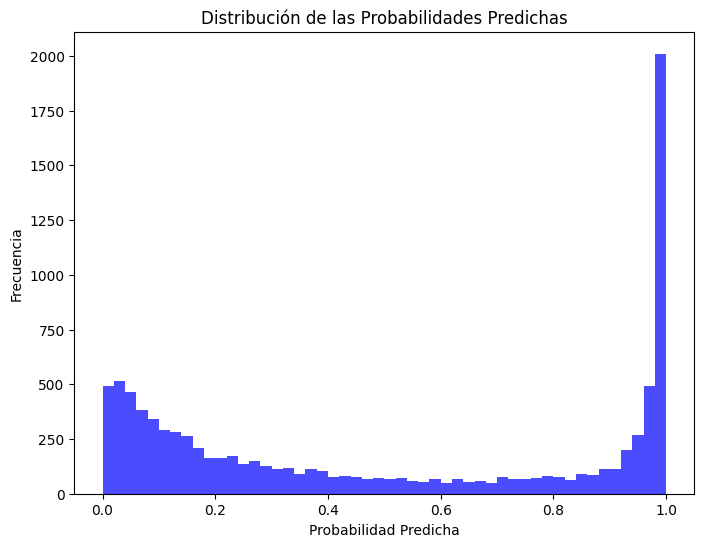

In [10]:
# Obtener las probabilidades predichas
y_probs = log_reg_model.predict_proba(X_test)[:, 1]

# Graficar distribución de probabilidades
plt.figure(figsize=(8, 6))
plt.hist(y_probs, bins=50, color='blue', alpha=0.7)
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Probabilidades Predichas')
plt.show()


#### Métricas del Modelo de Regresión Logística

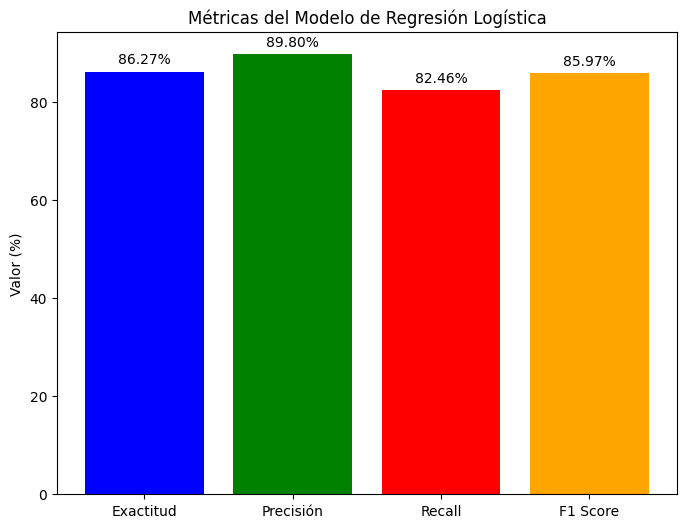

In [11]:
precision = precision_score(y_test, y_pred, average='binary')  # Asegúrate de especificar el promedio
recall = recall_score(y_test, y_pred, average='binary')  # Igual aquí

import matplotlib.pyplot as plt

# Supongamos que estas son las métricas calculadas (valores escalares)
metrics = [accuracy, precision, recall, f1]
metric_names = ['Exactitud', 'Precisión', 'Recall', 'F1 Score']

# Convertimos las métricas a porcentaje
metrics_percent = [metric * 100 for metric in metrics]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(metric_names, metrics_percent, color=['blue', 'green', 'red', 'orange'])

# Añadir los valores de las métricas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # La posición horizontal (centro de la barra)
        yval + 1,  # La posición vertical (un poco por encima de la barra)
        f'{yval:.2f}%',  # El texto a mostrar (formato porcentaje)
        ha='center',  # Alinear horizontalmente en el centro
        va='bottom',  # Alinear verticalmente en la parte inferior de la barra
        fontsize=10
    )

# Personalizar el gráfico
plt.title('Métricas del Modelo de Regresión Logística')
plt.ylabel('Valor (%)')
plt.show()



In [12]:
# === 6. GUARDAR MÉTRICAS EN UN CSV ===

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({
    'modelo': ['Regresión Logística'],
    'accuracy': [accuracy],
    'precision': [precision],
    'recall': [recall],
    'f1_score': [f1]
})

# Guardar en un archivo
metrics_df.to_csv('resultados_metricas.csv', index=False)

print("Métricas guardadas en 'resultados_metricas.csv'")

Métricas guardadas en 'resultados_metricas.csv'


In [13]:
import joblib

# Guardar el modelo entrenado
joblib.dump(log_reg_model, 'modelo_regresion_logistica.pkl')

print("Modelo guardado en 'modelo_regresion_logistica.pkl'")

Modelo guardado en 'modelo_regresion_logistica.pkl'


### Modelo de prediccón a partir de una sentencia

In [14]:
# Cargar el modelo desde el archivo
modelo_cargado = joblib.load('modelo_regresion_logistica.pkl')

# Usar el modelo cargado para hacer predicciones
nuevas_preds = modelo_cargado.predict(X_test)  # Por ejemplo, sobre X_test

In [15]:
import torch
from transformers import AutoTokenizer, AutoModel
import joblib
import numpy as np

# === 1. CARGAR MODELOS ===
# Cargar modelo y tokenizer de CardiffNLP
model_name = 'cardiffnlp/twitter-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
embedding_model = AutoModel.from_pretrained(model_name)

# Cargar el modelo de regresión logística previamente guardado
modelo_clasificador = joblib.load('modelo_regresion_logistica.pkl')

# === 2. DEFINIR MÉTODO PARA PREDECIR ===
def predict_hate_speech(frase):
    # Tokenizar entrada
    inputs = tokenizer(
        frase,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=128  # ← Agregado para evitar warnings
    )
    
    # Obtener embedding
    with torch.no_grad():
        outputs = embedding_model(**inputs)
    
    # Mean pooling
    last_hidden_state = outputs.last_hidden_state
    embedding_mean = last_hidden_state.mean(dim=1).numpy()

    # Predecir
    pred = modelo_clasificador.predict(embedding_mean)[0]
    
    # Interpretar predicción
    return "Hate Speech ⚠️" if pred == 1 else "No Hate Speech ✅"



/Users/eventsequor/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [16]:
frase = "I hate you so much!"
resultado = predict_hate_speech(frase)
print(resultado)

No Hate Speech ✅


In [17]:
# Acceder a los coeficientes de la regresión logística
coeficientes = modelo_clasificador.coef_[0]  # (768,)

# Ordenar dimensiones por importancia
importancia_dims = np.argsort(coeficientes)[::-1]  # Mayor a menor

# Mostrar las 10 dimensiones más relacionadas con hate
print("Top 10 dimensiones más asociadas a hate speech:")
for idx in importancia_dims[:10]:
    print(f"Dimensión {idx} → Peso: {coeficientes[idx]:.4f}")


Top 10 dimensiones más asociadas a hate speech:
Dimensión 237 → Peso: 2.3100
Dimensión 182 → Peso: 2.3013
Dimensión 428 → Peso: 2.2513
Dimensión 2 → Peso: 2.0184
Dimensión 746 → Peso: 1.9581
Dimensión 393 → Peso: 1.8526
Dimensión 719 → Peso: 1.7818
Dimensión 638 → Peso: 1.7315
Dimensión 744 → Peso: 1.7248
Dimensión 81 → Peso: 1.7032


In [18]:
from transformers import RobertaTokenizer

# Cargar el tokenizador de RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base')

# Acceder a los coeficientes de la regresión logística
coeficientes = modelo_clasificador.coef_[0]  # (768,)

# Ordenar dimensiones por importancia
importancia_dims = np.argsort(coeficientes)[::-1]  # Mayor a menor

# Mostrar las 10 palabras más asociadas a hate speech
print("Top 10 tokens más asociados a hate speech:")
for idx in importancia_dims[:10]:
    # Obtener el token asociado a esta dimensión
    token_id = idx  # El índice aquí corresponde al token ID de RoBERTa
    token = tokenizer.decode([token_id])  # Decodificar el token a una palabra/fragmento
    print(f"Token: {token} → Coeficiente: {coeficientes[idx]:.4f}")


Top 10 tokens más asociados a hate speech:
Token:  four → Coeficiente: 2.3100
Token:  very → Coeficiente: 2.3013
Token: b → Coeficiente: 2.2513
Token: </s> → Coeficiente: 2.0184
Token:  total → Coeficiente: 1.9581
Token:  never → Coeficiente: 1.8526
Token:  December → Coeficiente: 1.7818
Token:  record → Coeficiente: 1.7315
Token:  death → Coeficiente: 1.7248
Token:  over → Coeficiente: 1.7032
